# Support Vector Machine

# https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import svm
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p7.5.csv')  # load data set
data = data.sort_values(by=['area'])
data

,price,area
12,186750,1525
6,168500,1550
10,156200,1660
5,179700,1710
9,180400,1720
8,168800,1840
0,229500,1850
7,234400,1920
3,195100,1930
13,202100,2030


In [3]:
X = data.iloc[:, 1].values.reshape(-1, 1)  # 取第 0列   values converts it into a numpy array
Y = data.iloc[:, 0].values.reshape(-1, 1)  # 取第 1列   -1 means that calculate the dimension of rows, but have 1 column



In [4]:
model= SVR(kernel='rbf')
model.fit(X,Y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [5]:
Y_pred = model.predict(X)  # make predictions
Y_pred

array([202094.08028131, 202093.85474197, 202093.59745992, 202093.94514388,
       202094.0491106 , 202095.99958372, 202096.20397365, 202097.70611645,
       202097.92441018, 202100.00000009, 202101.18403672, 202102.13901775,
       202102.32768437, 202102.22271968, 202101.34798162])

In [6]:
print(model.score(X,Y))
print(model.score(X,Y_pred))

-0.09952318535390137
1.0


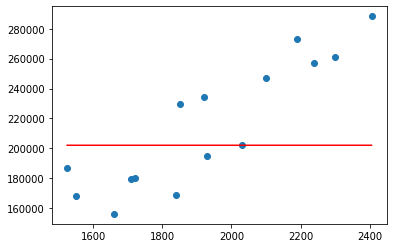

In [7]:
plt.scatter(X, Y)
#plt.plot(X, Y, color='black')
plt.plot(X, Y_pred, color='red')
plt.show()

## 必須先將資料標準化，使用以下兩種方法之一  

In [8]:
#將資料比例縮放到0與1之間
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)
X

array([[0.        ],
       [0.02840909],
       [0.15340909],
       [0.21022727],
       [0.22159091],
       [0.35795455],
       [0.36931818],
       [0.44886364],
       [0.46022727],
       [0.57386364],
       [0.65340909],
       [0.75568182],
       [0.8125    ],
       [0.88068182],
       [1.        ]])

In [9]:
#將資料常態分布化，平均值會變為0, 標準差變為1，使離群值影響降低
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)
X

array([[-1.53322538],
       [-1.4388924 ],
       [-1.02382729],
       [-0.83516133],
       [-0.79742813],
       [-0.34462982],
       [-0.30689663],
       [-0.04276428],
       [-0.00503109],
       [ 0.37230083],
       [ 0.63643318],
       [ 0.97603191],
       [ 1.16469787],
       [ 1.39109703],
       [ 1.78729555]])

In [10]:
model= SVR(kernel='rbf')
model.fit(X,Y)
Y_pred = model.predict(X)  # make predictions
Y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.78605824, -0.86259234, -1.00936703, -0.95546762, -0.93620691,
       -0.54627932, -0.50466948, -0.19313025, -0.14650193,  0.32979598,
        0.6463699 ,  0.97560615,  1.10320881,  1.19608594,  1.19014529])

In [11]:
Y_pred = model.predict(X)  # make predictions
Y_pred

array([-0.78605824, -0.86259234, -1.00936703, -0.95546762, -0.93620691,
       -0.54627932, -0.50466948, -0.19313025, -0.14650193,  0.32979598,
        0.6463699 ,  0.97560615,  1.10320881,  1.19608594,  1.19014529])

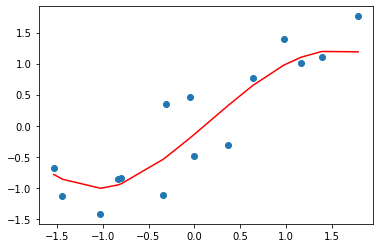

In [12]:
plt.scatter(X, Y)
#plt.plot(X, Y, color='black')
plt.plot(X, Y_pred, color='red')
plt.show()